<a href="https://colab.research.google.com/github/migue212852/SistemaSalud/blob/main/An%C3%A1lisis_Casos_de_Dengue_en_Arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

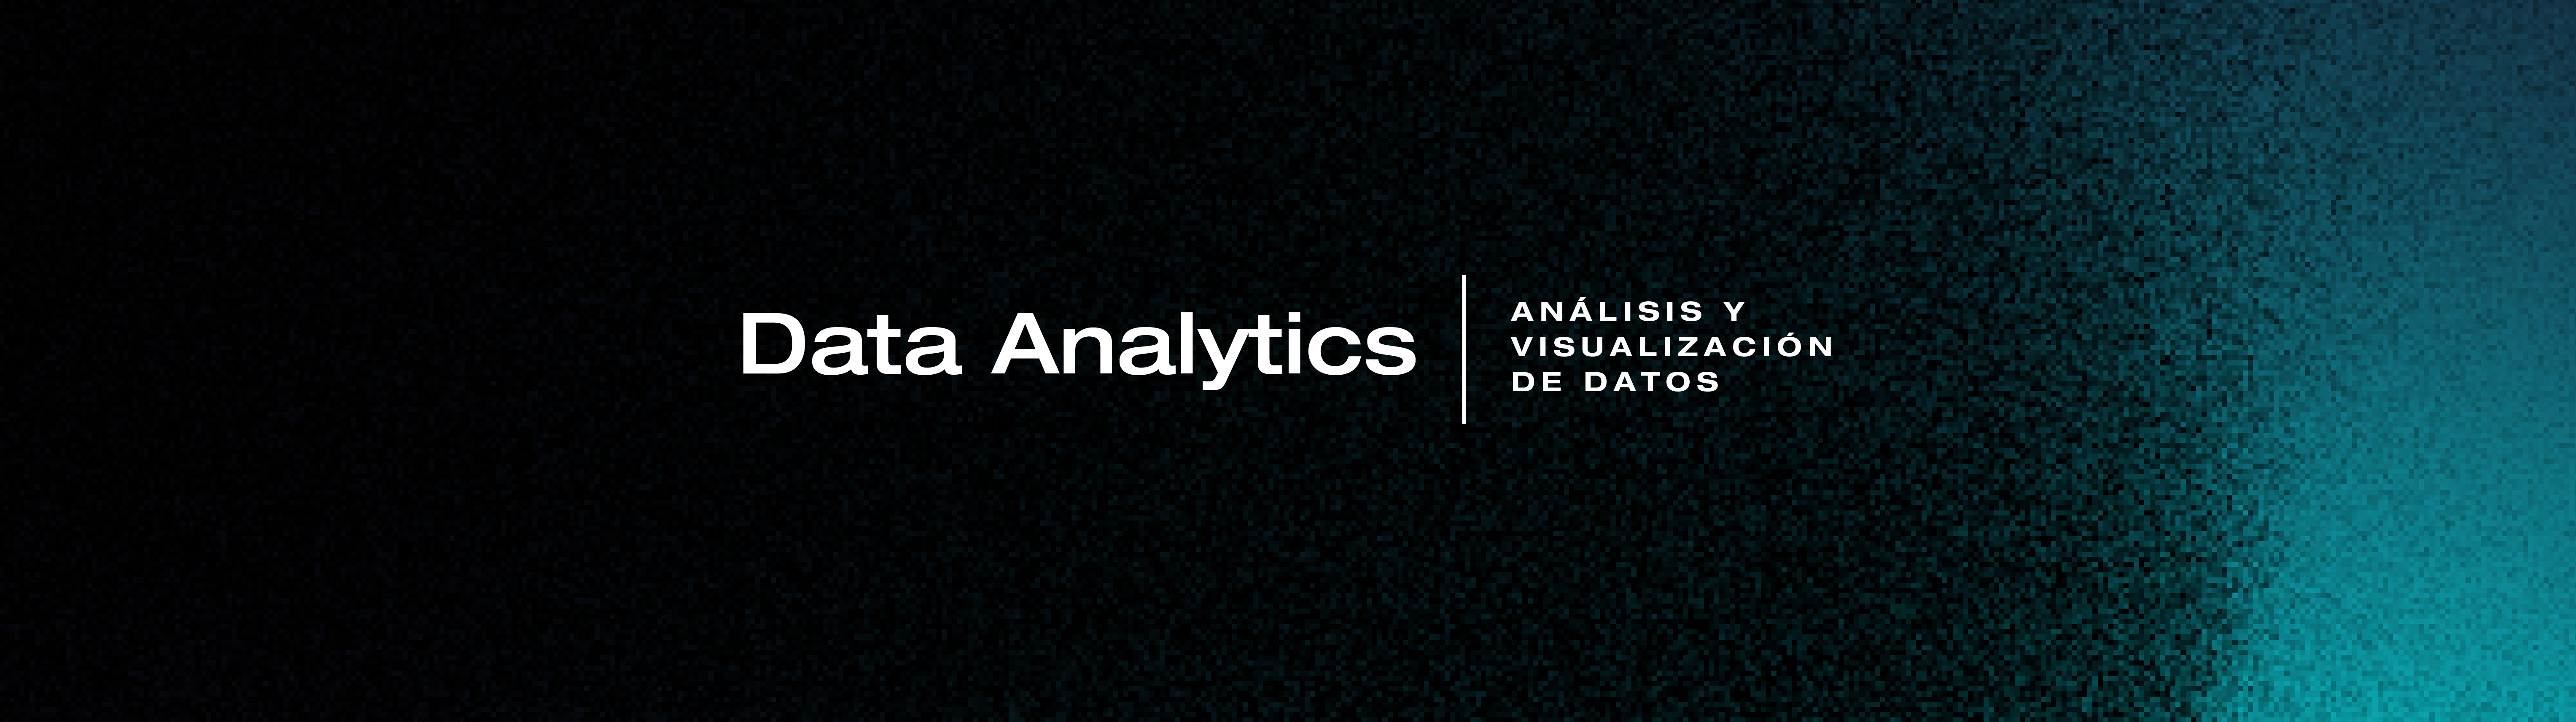

# **Reyes Miguel**- Tecnicatura en Desarrollo de Software

**Base de datos de acceso publica** :

Ministerio de Salud. Secretaría de Promoción de la Salud, Prevención y Control de Riesgos. Subsecretaría de Prevención y Control de Enfermedades Comunicables e Inmunoprevenibles. Dirección Nacional de Epidemiología y Análisis de la Situación de Salud. Área de Vigilancia.

# Librerias y complementos

In [ ]:
'''
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials


gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link1 = 'https://drive.google.com/file/d/1jUEDtjyKyBnRq5ikhayp2kfNe30IgZAm/view?usp=sharing'


id = link1.split("/")[-2]


downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset- dengue-salud.csv')
'''


## Librerías

In [22]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

sns.set_context('notebook', font_scale=1.2)

In [23]:
# Leer el archivo CSV especificando el delimitador ';'
url="https://github.com/migue212852/SistemaSalud/raw/refs/heads/main/dataset_dengue_salud_gral.csv"
df = pd.read_csv(url, encoding='latin1', sep=';')
# Mostrar las primeras filas del DataFrame
print(df.head())


  departamento_id departamento_nombre  provincia_id provincia_nombre  anio  \
0               0          *sin dato*             6     Buenos Aires  2018   
1             035          Avellaneda             6     Buenos Aires  2018   
2             035          Avellaneda             6     Buenos Aires  2018   
3             035          Avellaneda             6     Buenos Aires  2018   
4             035          Avellaneda             6     Buenos Aires  2018   

   semanas_epidemiologicas evento_nombre grupo_edad_id  grupo_edad_desc  \
0                       11        Dengue            10  De 45 a 64 años   
1                        7        Dengue             8  De 20 a 24 años   
2                        7        Dengue            10  De 45 a 64 años   
3                        9        Dengue             6  De 10 a 14 años   
4                        9        Dengue             8  De 20 a 24 años   

   cantidad_casos  
0             1.0  
1             1.0  
2             1.0  


# Información genereal del dataset: "Dengue Salud"

### Abstract del Conjunto de Datos de Dengue en Argentina

Este conjunto de datos contiene información epidemiológica relacionada con los casos de dengue en Argentina desde el segundo semestre de 2018 y enero de 2025, organizada por variables geográficas, temporales, demográficas y de eventos sanitarios. Su propósito principal es proporcionar una base sólida para el análisis de la distribución y evolución del dengue en diferentes regiones del país, permitiendo identificar tendencias, patrones y factores de riesgo.

#### Descripción de las variables:
1. **`departamento_id` y `departamento_nombre`**: Identificadores y nombres de los departamentos donde se registraron los casos.
2. **`provincia_id` y `provincia_nombre`**: Identificadores y nombres de las provincias asociadas a los departamentos.
3. **`anio`**: Año en el que ocurrieron los casos registrados.
4. **`semanas_epidemiologicas`**: Semana del año en la que se registraron los casos, siguiendo el estándar epidemiológico.
5. **`evento_nombre`**: Nombre del evento de salud pública, en este caso, relacionado con casos de dengue.
6. **`grupo_edad_id` y `grupo_edad_desc`**: Identificadores y descripciones de los grupos etarios afectados.
7. **`cantidad_casos`**: Número de casos registrados para la combinación específica de las variables anteriores.

#### Origen del conjunto de datos:
El dataset fue recopilado y unificado de las bases de datos abiertos del ministerio de Salud, ([web oficial](https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika)) por entidades gubernamentales de salud pública en Argentina para monitorear y controlar los brotes de dengue en todo el país. Los datos provienen de reportes oficiales y registros sanitarios estandarizados.

#### Propósito:
El conjunto de datos es clave para:
- Monitorear el comportamiento del dengue a nivel temporal (año y semanas epidemiológicas).
- Analizar la distribución geográfica de los casos.
- Identificar grupos etarios más vulnerables y regiones con mayor incidencia.
- Desarrollar estrategias de prevención y control basadas en evidencia.

#### Información relevante:
Los datos reflejan una estructura jerárquica basada en provincias y departamentos, lo que permite un análisis granular. Además, incluyen una perspectiva temporal y demográfica que facilita estudios longitudinales y transversales del dengue en Argentina. Este conjunto de datos es útil para epidemiólogos, investigadores de salud pública y autoridades sanitarias en la toma de decisiones y la planificación de intervenciones.


## Exploración de los datos y validación

###Cantidad de filas y columnas:

In [24]:
print(f' Filas y Columnas del archivo Original{df.shape}')


 Filas y Columnas del archivo Original(67823, 10)


##Diferentes Variables

In [25]:
variables = list(df.columns)
#for index, variable in enumerate(variables):
print(f'la cantidad de variables son {len(variables)}\n son las siguientes:\n {variables}')

la cantidad de variables son 10
 son las siguientes:
 ['departamento_id', 'departamento_nombre', 'provincia_id', 'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre', 'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos']


### Información de las variables

In [26]:
print("Info DataSet Original")
df.info()

Info DataSet Original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67823 entries, 0 to 67822
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   departamento_id          67823 non-null  object 
 1   departamento_nombre      67823 non-null  object 
 2   provincia_id             67823 non-null  int64  
 3   provincia_nombre         67823 non-null  object 
 4   anio                     67823 non-null  int64  
 5   semanas_epidemiologicas  67823 non-null  int64  
 6   evento_nombre            67823 non-null  object 
 7   grupo_edad_id            67821 non-null  object 
 8   grupo_edad_desc          67823 non-null  object 
 9   cantidad_casos           67822 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.2+ MB


In [27]:
# Obtener una muestra aleatoria de 100 filas
sample_df = df.sample(n=30, random_state=42)  # random_state para reproducibilidad

# Imprimir la muestra en pantalla
display(sample_df)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
45548,126,San Alberto,14,Córdoba,2024,18,Dengue,6,De 10 a 14 años,1.0
49602,21,Diamante,30,Entre Ríos,2024,9,Dengue,7,De 15 a 19 años,1.0
44519,42,General San Martín,14,Córdoba,2024,15,Dengue,6,De 10 a 14 años,45.0
33589,4,COMUNA 4,2,CABA,2024,9,Dengue,7,De 15 a 19 años,11.0
55254,7,Albardón,70,San Juan,2024,17,Dengue,7,De 15 a 19 años,1.0
58101,70,Pocito,70,San Juan,2024,10,Dengue,8,De 20 a 24 años,2.0
26458,14,Capital,14,Córdoba,2023,21,Dengue,5,De 5 a 9 años,4.0
24598,10,COMUNA 10,2,CABA,2023,19,Dengue,8,De 20 a 24 años,3.0
1097,54049,General Manuel Belgrano,54,Misiones,2019,15,Dengue,8,De 25 a 34 anos,1.0
50811,113,Villaguay,30,Entre Ríos,2024,18,Dengue,12,Mayores de 65 años,3.0


### describe()

In [28]:
df.describe()

,provincia_id,anio,semanas_epidemiologicas,cantidad_casos
count,67823.000000,67823.000000,67823.000000,67822.000000
mean,39.004939,2022.869130,15.461024,11.734614
std,31.009620,1.606879,9.108064,44.059826
min,0.000000,2018.000000,1.000000,1.000000
25%,10.000000,2023.000000,10.000000,1.000000
50%,30.000000,2024.000000,14.000000,2.000000
75%,66.000000,2024.000000,18.000000,7.000000
max,99.000000,2025.000000,53.000000,2349.000000


In [29]:
valores_nulos_por_columna = df.isnull().sum()
print(f"cantidad de valores nulos: \n\n{valores_nulos_por_columna}")

cantidad de valores nulos: 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
anio                       0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              2
grupo_edad_desc            0
cantidad_casos             1
dtype: int64


### Filas repetidas

In [30]:
df[df.duplicated()]

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
756,22063,General Guemes,22,Chaco,2019,15,Dengue,7,De 20 a 24 anos,1.0
874,38035,Ledesma,38,Jujuy,2019,23,Dengue,8,De 25 a 34 anos,1.0
1064,54042,Eldorado,54,Misiones,2019,20,Dengue,4,De 5 a 9 anos,1.0
1075,54049,General Manuel Belgrano,54,Misiones,2019,21,Dengue,5,De 10 a 14 anos,1.0
1432,66056,Grl. Jose de San Martin,66,Salta,2019,22,Dengue,8,De 25 a 34 anos,1.0
1523,66126,Oran,66,Salta,2019,14,Dengue,6,De 15 a 19 anos,2.0
1571,66126,Oran,66,Salta,2019,14,Dengue,9,De 35 a 44 anos,2.0
1589,66126,Oran,66,Salta,2019,15,Dengue,10,De 45 a 65 anos,1.0
1860,82084,Rosario,82,Santa Fe,2019,15,Dengue,5,De 10 a 14 anos,1.0
11896,66007,Anta,66,Salta,2020,12,Dengue,11,Mayores de 65 anos,1.0


In [31]:
print(f"La cantidad de filas repetida es: {df[df.duplicated()].shape[0]}")

La cantidad de filas repetida es: 39


### Variable **quality**
Exploraremos y analizaremos los datos asociados con nuestra variable objetivo.

In [32]:
df['anio'].value_counts()

,count
anio,
2024,35175
2023,18228
2020,11034
2019,1273
2021,1146
2018,660
2022,293
2025,14


El Data Frame tiene **1359** filas sin repetir y 12 columnas no contiene datos nulos, exite un gran diferencia entre el tercer percentil y el valor maximo en varias caracteristicas lo que puede indicar la presencia de datos atipicos, la variable quality es de tipo discreta y va de 3 a 8 y el valor que se repite mas es de 5.


<Axes: xlabel='provincia_nombre', ylabel='count'>

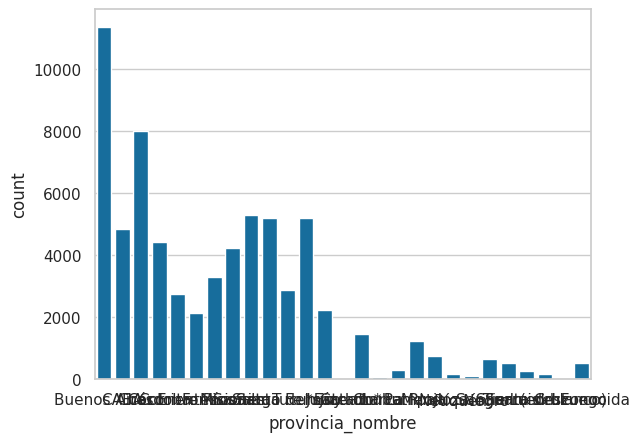

In [33]:
sns.set(style="whitegrid", palette="colorblind")

sns.countplot(data=df, x='provincia_nombre')

### DataSet Original

La observación detallada revela que no existen observaciones significativas asociadas con vinos de baja calidad ni con vinos de alta calidad. Este hallazgo sugiere que la distribución de las calidades de vino se concentra en niveles intermedios.

In [34]:
variables = list(df.columns)
variables = variables[:-1]
fig = plt.figure(figsize=(18, 20))
for index, variable in enumerate(variables):
    media = df[variable].mean()
    mediana = df[variable].median()
    moda = mode(df[variable])[0].item()
    plt.subplot(6, 2, index+1)
    sns.histplot(df[variable], kde=True)
    plt.axvline(media, color='y', linestyle='dashed', linewidth=2, label='Media')
    plt.axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')
    plt.axvline(moda, color='g', linestyle='dashed', linewidth=2, label='Moda')
fig.tight_layout(pad=1.0)

TypeError: can only concatenate str (not "int") to str

<Figure size 1800x2000 with 0 Axes>

## Preguntas a respodner:

1.**¿Cómo podemos mejorar la calidad del vino?**

### Preguntas Secundarias
1. ¿Cuáles son los factores que más influyen en la calidad del vino según este conjunto de datos?

2. ¿Existe una relación lineal o no lineal entre las variables químicas y la calidad del vino?